In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Import all exported files from main script to prevent project conflicts
file_path = os.path.join("Resources","Population+Drive+Median_Income_by_Zip.csv")
income_df=pd.read_csv(file_path)
file_path= os.path.join("Resources","ktop100latlng.csv")
latlng_df=pd.read_csv(file_path)
file_path =os.path.join('Resources','ZIP-COUNTY-FIPS_2018-03.csv')
df_fp=pd.read_csv(file_path)
file_path =os.path.join('Resources','Florida_Cases_Zips_COVID19.csv')
florida=pd.read_csv(file_path)

In [2]:
latlng_df.head()

,date,county,state,fips,cases_x,deaths,cases_y,rate,Population,Latitude,Longitude
0,9/8/2020,Tehama,California,6103.0,453,1,4,112.250000,144905,40.027102,-122.123323
1,9/8/2020,Bingham,Idaho,16011.0,676,9,7,95.571429,121264,43.211230,-112.362415
2,9/8/2020,Stone,Missouri,29209.0,316,2,4,78.000000,121684,36.774888,-93.459933
3,9/8/2020,Sebastian,Arkansas,5131.0,3042,38,40,75.050000,142299,35.226040,-94.315422
4,9/8/2020,Portage,Wisconsin,55097.0,798,2,11,71.545455,143879,43.539149,-89.462620


In [3]:
df_fp.head(100)

,ZIP,STCOUNTYFP,CITY,STATE,COUNTYNAME,CLASSFP
0,36091,1001,Verbena,AL,Autauga County,H1
1,36758,1001,Plantersville,AL,Autauga County,H1
2,36006,1001,Billingsley,AL,Autauga County,H1
3,36067,1001,Prattville,AL,Autauga County,H1
4,36701,1001,Selma,AL,Autauga County,H1
...,...,...,...,...,...,...
95,36456,1013,Mc kenzie,AL,Butler County,H1
96,36030,1013,Forest home,AL,Butler County,H1
97,36032,1013,Fort deposit,AL,Butler County,H1
98,36037,1013,Greenville,AL,Butler County,H1


In [4]:
florida.head()
florida.dtypes



OBJECTID          int64
ZIP               int64
OBJECTID_1        int64
DEPCODE           int64
COUNTYNAME       object
FieldMatch       object
POName           object
Places           object
OBJECTID_12     float64
ZIPX             object
c_places         object
Cases_1         float64
LabelY            int64
SHAPE_Length    float64
SHAPE_Area      float64
dtype: object

In [5]:
income_df.head()

,Name,Population,Population II,Male Population,Drive to Work - Solo Driver,Public Transportation,Work from Home,Median Income,Zipcode
0,ZCTA5 43964,8642,NaN,NaN,3173.0,0.0,75.0,25320.0,43964
1,ZCTA5 28216,51116,NaN,NaN,20406.0,742.0,1499.0,30701.0,28216
2,ZCTA5 28277,71605,NaN,NaN,28558.0,326.0,4072.0,54326.0,28277
3,ZCTA5 28278,27286,NaN,NaN,11700.0,36.0,1282.0,40769.0,28278
4,ZCTA5 28303,29414,NaN,NaN,11272.0,131.0,512.0,26706.0,28303


In [6]:
data=income_df[['Population','Zipcode','Median Income']]

In [7]:
income_data_df=data.rename({'Zipcode':'ZIP'},axis=1)

In [8]:
income_data_df.head(100)

,Population,ZIP,Median Income
0,8642,43964,25320.0
1,51116,28216,30701.0
2,71605,28277,54326.0
3,27286,28278,40769.0
4,29414,28303,26706.0
...,...,...,...
95,2309,29448,16799.0
96,38267,29466,49087.0
97,9242,29472,24089.0
98,22056,29488,21427.0


In [9]:
# Merge Census and Florida State COVID data
zip_income=pd.merge(income_data_df,florida,on='ZIP')

In [10]:
# Adding in step to adjust data after other subsequent code 
zip_income_data=zip_income
zip_income_data.head(100)

# drop negative median incomes and null values
zip_income_drop_blank = zip_income_data[(zip_income_data['Median Income']!='')]
zip_income_clean = zip_income_drop_blank[(zip_income_drop_blank['Median Income']>0)]
zip_income_clean['Median Income'] = pd.to_numeric(zip_income_clean['Median Income'])
zip_income_clean.head()
zip_income_clean.dtypes

C:\Users\jddar\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
<ipython-input-10-b7029a301eaa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_income_clean['Median Income'] = pd.to_numeric(zip_income_clean['Median Income'])


Population         int64
ZIP                int64
Median Income    float64
OBJECTID           int64
OBJECTID_1         int64
DEPCODE            int64
COUNTYNAME        object
FieldMatch        object
POName            object
Places            object
OBJECTID_12      float64
ZIPX              object
c_places          object
Cases_1          float64
LabelY             int64
SHAPE_Length     float64
SHAPE_Area       float64
dtype: object

In [11]:
# Calculate rate
zip_income_clean['rate']=(100000/zip_income_clean.Population)*zip_income_clean.Cases_1
zip_income_clean['rate']=zip_income_clean[(zip_income_clean['Median Income'].astype(float)>=0)]
zip_income_clean.head()

<ipython-input-11-33417e08b944>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_income_clean['rate']=(100000/zip_income_clean.Population)*zip_income_clean.Cases_1
<ipython-input-11-33417e08b944>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_income_clean['rate']=zip_income_clean[(zip_income_clean['Median Income'].astype(float)>=0)]


,Population,ZIP,Median Income,OBJECTID,OBJECTID_1,DEPCODE,COUNTYNAME,FieldMatch,POName,Places,OBJECTID_12,ZIPX,c_places,Cases_1,LabelY,SHAPE_Length,SHAPE_Area,rate
0,10433,32407,29184.0,203,438,3,Bay,Bay-32407,Panama City Beach,"Panama City Beach, Upper Grand Lagoon",31.0,Bay-32407,"Panama City, Panama City Beach",353.0,353,0.714102,0.005079,10433
1,13480,32425,22190.0,212,458,30,Holmes,Holmes-32425,Bonifay,"Caryville, Esto, Noma, Bonifay",476.0,Holmes-32425,"Bonifay, Caryville",580.0,580,1.206376,0.057953,13480
2,13480,32425,22190.0,213,460,67,Washington,Washington-32425,Bonifay,"Caryville, Bonifay",1113.0,Washington-32425,Bonifay,6.0,6,0.813919,0.009545,13480
3,926,32427,13150.0,215,465,67,Washington,Washington-32427,Caryville,"Caryville, Westville",1114.0,Washington-32427,Caryville,52.0,52,0.801515,0.012944,926
4,3975,32431,23324.0,219,471,32,Jackson,Jackson-32431,Cottondale,"Cottondale, Alford, Jacob City",494.0,Jackson-32431,Cottondale,184.0,184,1.015762,0.021373,3975


In [12]:
# Creation of equal bins on categorical Median Income data in $10K increments
bins = [9999, 19999, 29999, 39999, 49999, 75000]

# Create the names for the four bins
group_names = ["<$10K", "$10-20K", "$20-30K", "$30-40K", ">$50"]

In [13]:
# Split data into bins of $10K
zip_income_clean["Median Income Summary"] = pd.cut(zip_income_clean['Median Income'], bins, labels=group_names)
zip_income_clean.head()
zip_income_clean.describe()
zip_income_clean["Median Income Summary"].describe()
# zip_income_clean["Cases_1"].sum()

<ipython-input-13-9ad3e4a71de1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_income_clean["Median Income Summary"] = pd.cut(zip_income_clean['Median Income'], bins, labels=group_names)


count        1063
unique          5
top       $10-20K
freq          608
Name: Median Income Summary, dtype: object

In [14]:
# Print stats to check
var_numpy = np.var(zip_income_clean["Cases_1"])
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(zip_income_clean["Cases_1"])
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

ar_numpy = np.var(zip_income_clean["Median Income Summary"]=="$10-20K")
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(zip_income_clean["Median Income Summary"]=="$10-20K")
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 579302.3341727497
The population standard deviation using the NumPy module is 761.1191327070616
The population variance using the NumPy module is 579302.3341727497
The population standard deviation using the NumPy module is 0.49510089678849417


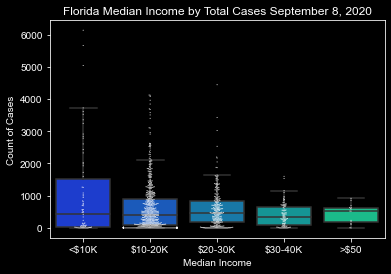

In [15]:
# Create ending date of COVID cases plot $10K
plt.style.use('dark_background')

g = sns.boxplot(x = 'Median Income Summary',y='Cases_1',data = zip_income_clean, palette="winter", showfliers=False, labels='0', color='001')
sns.swarmplot(x='Median Income Summary', y='Cases_1', data=zip_income_clean, color="001", size=1)
plt.xlabel('Median Income', color='001')
plt.ylabel('Count of Cases', color='001')
sns.set_style('ticks', {'axes.edgecolor': '001',  
                        'xtick.color': '001',
                        'ytick.color': '001'})


plt.style.use('dark_background')
plt.title('Florida Median Income by Total Cases September 8, 2020', color='001')
output_path = os.path.join("Images", "MIX.png")
plt.savefig(output_path, transparent=True)
plt.show()

 


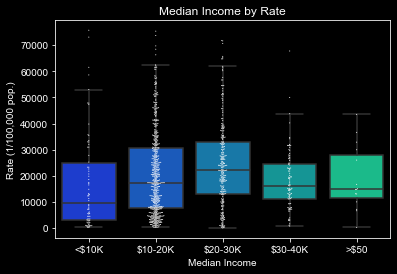

In [16]:
# Create ending date of COVID Rate plot $10K
plt.style.use('dark_background')
sns.boxplot(x = 'Median Income Summary',y='rate',data = zip_income_clean, palette="winter", showfliers=False)
sns.swarmplot(x='Median Income Summary', y='rate', data=zip_income_clean, color="001", size=1)

plt.xlabel('Median Income')
plt.ylabel('Rate (1/100,000 pop.)')

plt.title('Median Income by Rate')
output_path = os.path.join("Images", "MIR.png")
plt.savefig(output_path, transparent=True)
plt.show()

In [17]:
# groupby_df= income_latlong.groupby('Median Income Summary')
# gb_sum = groupby_df.sum()
# gb_count = groupby_df.count()
# gb_income = gb_sum / gb_count
# gb_income.head(100)

In [18]:
# bar chart for reporting over time
file_path = os.path.join("Resources","us-counties1.csv")
rate_data=pd.read_csv(file_path)
rate_data.head()


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [19]:
# Create DF for County Case Count
county_count_date = rate_data.groupby(['date']).count()[['county']]
county_count_date
date = rate_data['date'].unique()
date_county = pd.DataFrame({"Date" : date, "County_Count" : county_count_date['county']})
date_county.head()


,Date,County_Count
date,,
2020-01-21,2020-01-21,1
2020-01-22,2020-01-22,1
2020-01-23,2020-01-23,1
2020-01-24,2020-01-24,2
2020-01-25,2020-01-25,3


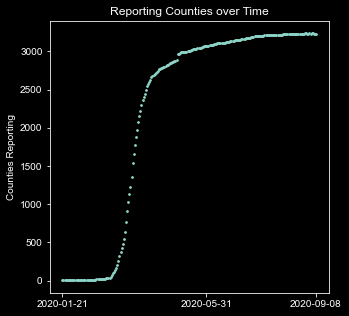

In [20]:
# Create chart reporting over time for Dynata Data
plt.style.use('dark_background')
x_values = date_county['Date']
y_values = date_county['County_Count']
z_values = (date_county['County_Count']/3234).astype(float)

plt.figure(figsize=(5,5))
plt.scatter(x_values, y_values, s=3)


# plt.xticks(np.arange(0, len(x_values), 77))
plt.xticks(['2020-01-21','2020-05-31','2020-09-08'])
plt.grid(False)

plt.ylabel('Counties Reporting')
plt.title('Reporting Counties over Time')
output_path = os.path.join("Images", "county_count.png")
plt.savefig(output_path,  transparent=True)
plt.show()

In [21]:
print(z_values)

date
2020-01-21    0.000309
2020-01-22    0.000309
2020-01-23    0.000309
2020-01-24    0.000618
2020-01-25    0.000928
                ...   
2020-09-04    1.000000
2020-09-05    1.000000
2020-09-06    0.999382
2020-09-07    0.999691
2020-09-08    0.999691
Name: County_Count, Length: 232, dtype: float64


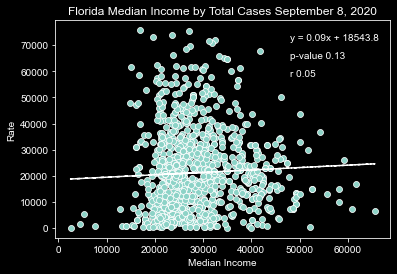

In [22]:
# Create scatter chart for Florida Data of Rate
x_values = zip_income_clean['Median Income']
y_values = zip_income_clean['rate'].astype(float)

# # Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_val = "p-value " + str(round(pvalue,2))
r_val = "r " + str(round(rvalue,2))

plt.style.use('dark_background')

g = sns.scatterplot(x = 'Median Income',y='rate', data = zip_income_clean, palette="cool")
plt.xlabel('Median Income', color='001')
plt.ylabel('Rate', color='001')
plt.annotate(line_eq, (48000,72000), fontsize=10, color="white")
plt.annotate(p_val, (48000,65000), fontsize=10, color="white")
plt.annotate(r_val, (48000,58000), fontsize=10, color="white")
plt.plot(x_values, regression_values, linestyle="--", color='white')


plt.style.use('dark_background')
plt.title('Florida Median Income by Total Cases September 8, 2020', color='001')
output_path = os.path.join("Images", "scatter.png")
plt.savefig(output_path, transparent=True)
plt.show()

 


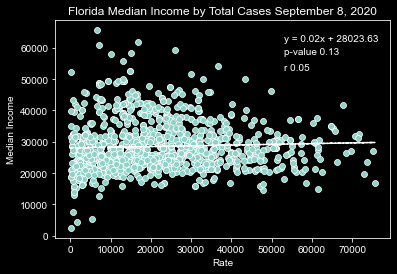

In [23]:
# Create scatter chart for Florida Data of Rate flip axis
y_values = zip_income_clean['Median Income']
x_values = zip_income_clean['rate'].astype(float)

# # Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values_2 = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_val = "p-value " + str(round(pvalue,2))
r_val = "r " + str(round(rvalue,2))

plt.style.use('dark_background')

g = sns.scatterplot(x = 'rate',y='Median Income', data = zip_income_clean, palette="cool")
plt.xlabel('Rate', color='001')
plt.ylabel('Median Income', color='001')
plt.annotate(line_eq, (53000,62000), fontsize=10, color="white")
plt.annotate(p_val, (53000,58000), fontsize=10, color="white")
plt.annotate(r_val, (53000,53000), fontsize=10, color="white")
plt.plot(x_values, regression_values_2, linestyle="--", color='white')


plt.style.use('dark_background')
plt.title('Florida Median Income by Total Cases September 8, 2020', color='001')
output_path = os.path.join("Images", "scatter_2.png")
plt.savefig(output_path, transparent=True)
plt.show()


In [24]:
# Create new bins
bins_2 = [0,17499, 34999, 52499, 75000]

# Create the names for the four bins
group_names_2 = ["<17.5","$17.5K-$35K", "$35-52.5K", "$52.5-75K"]

In [25]:
# Split data in bins
zip_income_clean["Median Income Summary_2"] = pd.cut(zip_income_clean['Median Income'], bins_2, labels=group_names_2)
zip_income_clean.head()
zip_income_clean.describe()
zip_income_clean["Median Income Summary_2"].describe()
# zip_income_clean["Cases_1"].sum()

<ipython-input-25-e821ff2a2bf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_income_clean["Median Income Summary_2"] = pd.cut(zip_income_clean['Median Income'], bins_2, labels=group_names_2)


count            1067
unique              4
top       $17.5K-$35K
freq              836
Name: Median Income Summary_2, dtype: object

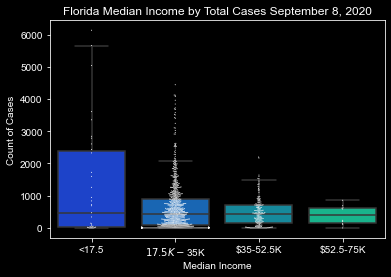

In [26]:
# Plot bins for cases
plt.style.use('dark_background')

g = sns.boxplot(x = 'Median Income Summary_2',y='Cases_1',data = zip_income_clean, palette="winter", showfliers=False, labels='0', color='001')
sns.swarmplot(x='Median Income Summary_2', y='Cases_1', data=zip_income_clean, color="001", size=1)
plt.xlabel('Median Income', color='001')
plt.ylabel('Count of Cases', color='001')
sns.set_style('ticks', {'axes.edgecolor': '001',  
                        'xtick.color': '001',
                        'ytick.color': '001'})

plt.style.use('dark_background')
plt.title('Florida Median Income by Total Cases September 8, 2020', color='001')
output_path = os.path.join("Images", "MIX2.png")
plt.savefig(output_path, transparent=True)
plt.show()

In [27]:
# Calculate quartile data
quantiles = zip_income_clean['Median Income'].quantile([.25,.5,.75,1])
quantiles

0.25    23066.0
0.50    26658.0
0.75    32176.5
1.00    65625.0
Name: Median Income, dtype: float64

In [28]:
# Create bins according to quartile data distribution on Income data
bins_3 = [0, 23066, 26658, 32176, 65625]

# Create the names for the four bins
group_names_3 = ["<23K Q1","$23-26.6K Q2", "$26.6-32.2K Q3", ">$32.2K"]

zip_income_clean["Median Income Summary_3"] = pd.cut(zip_income_clean['Median Income'], bins_3, labels=group_names_3)
zip_income_clean.head()
zip_income_clean.describe()
zip_income_clean["Median Income Summary_3"].describe()
# zip_income_clean["Cases_1"].sum()

<ipython-input-28-f030da25351b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip_income_clean["Median Income Summary_3"] = pd.cut(zip_income_clean['Median Income'], bins_3, labels=group_names_3)


count        1067
unique          4
top       >$32.2K
freq          267
Name: Median Income Summary_3, dtype: object

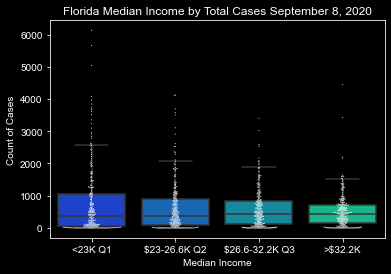

In [29]:
# Plot case data on new bins
plt.style.use('dark_background')

g = sns.boxplot(x = 'Median Income Summary_3',y='Cases_1',data = zip_income_clean, palette="winter", showfliers=False, labels='0', color='001')
sns.swarmplot(x='Median Income Summary_3', y='Cases_1', data=zip_income_clean, color="001", size=1)
plt.xlabel('Median Income', color='001')
plt.ylabel('Count of Cases', color='001')
sns.set_style('ticks', {'axes.edgecolor': '001',  
                        'xtick.color': '001',
                        'ytick.color': '001'})

plt.style.use('dark_background')
plt.title('Florida Median Income by Total Cases September 8, 2020', color='001')
output_path = os.path.join("Images", "MIX3.png")
plt.savefig(output_path, transparent=True)
plt.show()

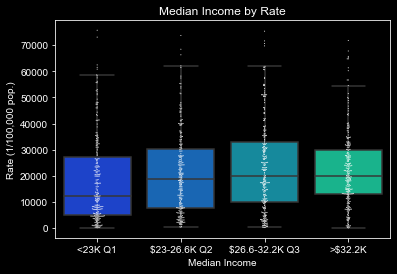

In [30]:
# Plot income and rate by appropriate data quartile distribution
plt.style.use('dark_background')
sns.boxplot(x = 'Median Income Summary_3',y='rate',data = zip_income_clean, palette="winter", showfliers=False)
sns.swarmplot(x='Median Income Summary_3', y='rate', data=zip_income_clean, color="001", size=1)

plt.xlabel('Median Income')
plt.ylabel('Rate (1/100,000 pop.)')

plt.title('Median Income by Rate')
output_path = os.path.join("Images", "MIR2.png")
plt.savefig(output_path, transparent=True)
plt.show()